In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [2]:
dfCardio = pd.read_csv('cardio_train.csv', sep=';')
dfCardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
dfCardio = dfCardio.set_index('id')
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


# Data Cleanning

## Null Data

In [4]:
dfCardio[dfCardio.isnull().T.any()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


## Outliers

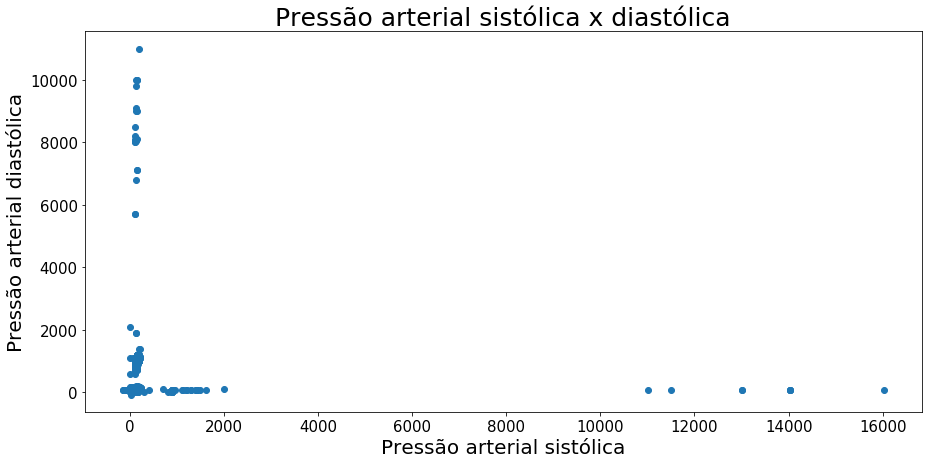

In [5]:
plt.figure(figsize=(15, 7))
plt.scatter(dfCardio.ap_hi, dfCardio.ap_lo)
plt.title('Pressão arterial sistólica x diastólica', fontsize=25)
plt.xlabel('Pressão arterial sistólica', fontsize=20)
plt.ylabel('Pressão arterial diastólica', fontsize=20)
plt.show()

## Excluindo instâncias com ap_hi <= ap_lo ou  ap_hi < 90 e > 300 ou ap_lo < 0 e > 300 

In [6]:
dfCardioOutliers = dfCardio[(dfCardio.ap_hi <= dfCardio.ap_lo) | (dfCardio.ap_hi < 90) | (dfCardio.ap_hi > 300) | (dfCardio.ap_lo < 0) | (dfCardio.ap_lo > 300)]
dfCardio = dfCardio.drop(dfCardioOutliers.index, axis=0)
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,22469,1,155,69.0,130,80,2,2,0,0,1,0
989,14648,1,163,71.0,110,70,1,1,0,0,1,1
990,21901,1,165,70.0,120,80,1,1,0,0,1,0
991,14549,2,165,85.0,120,80,1,1,1,1,1,0
992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


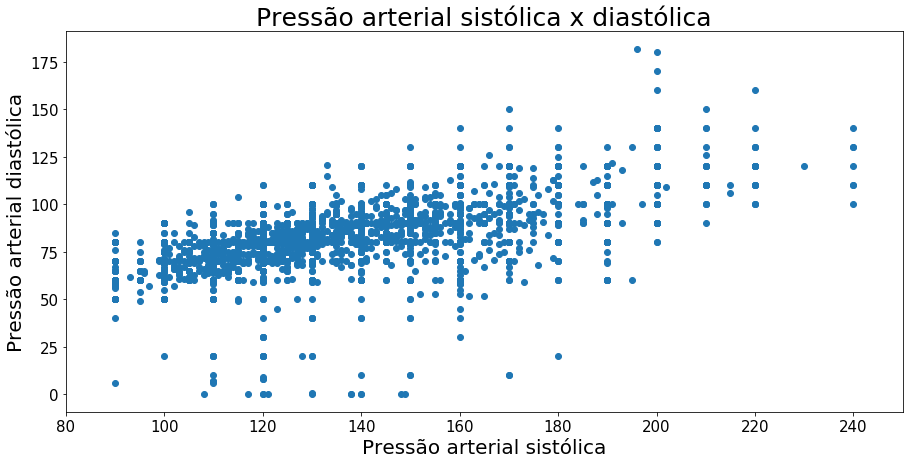

In [7]:
plt.figure(figsize=(15, 7))
plt.scatter(dfCardio.ap_hi, dfCardio.ap_lo)
plt.xlim(dfCardio.ap_hi.min() - 10, dfCardio.ap_hi.max() + 10)
plt.title('Pressão arterial sistólica x diastólica', fontsize=25)
plt.xlabel('Pressão arterial sistólica', fontsize=20)
plt.ylabel('Pressão arterial diastólica', fontsize=20)
plt.show()

# Feature Engineering

## Idade

In [8]:
dfCardio['age'] = dfCardio['age'] / 365
dfCardio = dfCardio.astype({'age': 'int32'})
dfCardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
988,61,1,155,69.0,130,80,2,2,0,0,1,0
989,40,1,163,71.0,110,70,1,1,0,0,1,1
990,60,1,165,70.0,120,80,1,1,0,0,1,0
991,39,2,165,85.0,120,80,1,1,1,1,1,0
992,64,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168,76.0,120,80,1,1,1,0,1,0
99995,61,1,158,126.0,140,90,2,2,0,0,1,1
99996,52,2,183,105.0,180,90,3,1,0,1,0,1


In [9]:
dfCardio['f_age'] =  None
dfCardio.loc[dfCardio.age < 10, 'f_age'] = 'criança'
dfCardio.loc[(dfCardio.age >= 10) & (dfCardio.age < 20), 'f_age'] = 'adolescente'
dfCardio.loc[(dfCardio.age >= 20) & (dfCardio.age < 60), 'f_age'] = 'adulto'
dfCardio.loc[dfCardio.age >= 60, 'f_age'] = 'idoso'
dfCardio = dfCardio.drop('age', axis=1)
dfCardio

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,f_age
id,,,,,,,,,,,,
988,1,155,69.0,130,80,2,2,0,0,1,0,idoso
989,1,163,71.0,110,70,1,1,0,0,1,1,adulto
990,1,165,70.0,120,80,1,1,0,0,1,0,idoso
991,2,165,85.0,120,80,1,1,1,1,1,0,adulto
992,1,155,62.0,120,80,1,1,0,0,1,0,idoso
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2,168,76.0,120,80,1,1,1,0,1,0,adulto
99995,1,158,126.0,140,90,2,2,0,0,1,1,idoso
99996,2,183,105.0,180,90,3,1,0,1,0,1,adulto


In [10]:
dfCardio['f_age'].isnull().sum()

0

## IMC

In [11]:
dfCardio['imc_rating'] = None
dfCardio.loc[round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) < 18.5, 'imc_rating'] = 'magreza'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 18.5) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 24.9), 'imc_rating'] = 'normal'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 25) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 29.9), 'imc_rating'] = 'sobrepeso'
dfCardio.loc[(round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 30) & (round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) <= 39.9), 'imc_rating'] = 'obesidade'
dfCardio.loc[round((dfCardio.weight / ((dfCardio.height / 100.0) * (dfCardio.height / 100.0))), 1) >= 40, 'imc_rating'] = 'obesidade_grave'
dfCardio = dfCardio.drop(['weight', 'height'], axis=1)
dfCardio

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating
id,,,,,,,,,,,
988,1,130,80,2,2,0,0,1,0,idoso,sobrepeso
989,1,110,70,1,1,0,0,1,1,adulto,sobrepeso
990,1,120,80,1,1,0,0,1,0,idoso,sobrepeso
991,2,120,80,1,1,1,1,1,0,adulto,obesidade
992,1,120,80,1,1,0,0,1,0,idoso,sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...
99993,2,120,80,1,1,1,0,1,0,adulto,sobrepeso
99995,1,140,90,2,2,0,0,1,1,idoso,obesidade_grave
99996,2,180,90,3,1,0,1,0,1,adulto,obesidade


In [12]:
dfCardio['imc_rating'].isnull().sum()

0

## Blood Pressure Stages

In [13]:
dfCardio['blood_pressure_stage'] = None
dfCardio.loc[(dfCardio.ap_hi < 120) & (dfCardio.ap_lo < 80), 'blood_pressure_stage'] = 'normal'
dfCardio.loc[((dfCardio.ap_hi >= 120) & (dfCardio.ap_lo <= 129)) & (dfCardio.ap_lo < 80), 'blood_pressure_stage'] = 'elevado'
dfCardio.loc[((dfCardio.ap_hi >= 130) & (dfCardio.ap_hi <= 139)) | ((dfCardio.ap_lo >= 80) & (dfCardio.ap_lo <= 89)), 'blood_pressure_stage'] = 'hipertensão_estágio_1'
dfCardio.loc[(dfCardio.ap_hi >= 140) | (dfCardio.ap_lo >= 90), 'blood_pressure_stage'] = 'hipertensão_estágio_2'
dfCardio.loc[(dfCardio.ap_hi > 180) | (dfCardio.ap_lo > 120), 'blood_pressure_stage'] = 'hipertensão_estágio_1'
dfCardio = dfCardio.drop(['ap_hi', 'ap_lo'], axis=1)
dfCardio

,gender,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating,blood_pressure_stage
id,,,,,,,,,,
988,1,2,2,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
989,1,1,1,0,0,1,1,adulto,sobrepeso,normal
990,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
991,2,1,1,1,1,1,0,adulto,obesidade,hipertensão_estágio_1
992,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
...,...,...,...,...,...,...,...,...,...,...
99993,2,1,1,1,0,1,0,adulto,sobrepeso,hipertensão_estágio_1
99995,1,2,2,0,0,1,1,idoso,obesidade_grave,hipertensão_estágio_2
99996,2,3,1,0,1,0,1,adulto,obesidade,hipertensão_estágio_2


In [14]:
dfCardio['blood_pressure_stage'].isnull().sum()

0

# Normalização

## Dados categóricos

In [15]:
dfCardio

,gender,cholesterol,gluc,smoke,alco,active,cardio,f_age,imc_rating,blood_pressure_stage
id,,,,,,,,,,
988,1,2,2,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
989,1,1,1,0,0,1,1,adulto,sobrepeso,normal
990,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
991,2,1,1,1,1,1,0,adulto,obesidade,hipertensão_estágio_1
992,1,1,1,0,0,1,0,idoso,sobrepeso,hipertensão_estágio_1
...,...,...,...,...,...,...,...,...,...,...
99993,2,1,1,1,0,1,0,adulto,sobrepeso,hipertensão_estágio_1
99995,1,2,2,0,0,1,1,idoso,obesidade_grave,hipertensão_estágio_2
99996,2,3,1,0,1,0,1,adulto,obesidade,hipertensão_estágio_2


In [16]:
col_cat = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'f_age', 'imc_rating', 'blood_pressure_stage']
dfCardioML_dummies = pd.get_dummies(dfCardio[col_cat].astype(str), drop_first=False)
dfCardioML_dummies

,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,...,f_age_idoso,imc_rating_magreza,imc_rating_normal,imc_rating_obesidade,imc_rating_obesidade_grave,imc_rating_sobrepeso,blood_pressure_stage_elevado,blood_pressure_stage_hipertensão_estágio_1,blood_pressure_stage_hipertensão_estágio_2,blood_pressure_stage_normal
id,,,,,,,,,,,,,,,,,,,,,
988,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
989,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
990,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
991,0,1,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
992,1,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
99995,1,0,0,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
99996,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
dfCardioML = pd.concat([dfCardio, dfCardioML_dummies], axis=1)
dfCardioML = dfCardioML.drop(col_cat, axis=1)
dfCardioML

,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,...,f_age_idoso,imc_rating_magreza,imc_rating_normal,imc_rating_obesidade,imc_rating_obesidade_grave,imc_rating_sobrepeso,blood_pressure_stage_elevado,blood_pressure_stage_hipertensão_estágio_1,blood_pressure_stage_hipertensão_estágio_2,blood_pressure_stage_normal
id,,,,,,,,,,,,,,,,,,,,,
988,0,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
989,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
990,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
991,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
992,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
99995,1,1,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
99996,1,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


# Training and Testing Data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Y = dfCardioML.cardio
X = dfCardioML.drop(['cardio'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Machine Learning

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

def MyDecisionTreeClassifier(X, Y, tree_levels, criterion):
    results = {'accuracy': [], 'error': []}
    for i in tree_levels:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=i)
        model = model.fit(X_train, Y_train)
        result = model.predict(X)
        accuracy = accuracy_score(Y, result);
        results['accuracy'].append(accuracy)
        results['error'].append(1 - accuracy)
    return results

def plot_graph(X, Y_train, Y_test, xlabel, ylabel, title):
    plt.figure(figsize=(15, 7))       
    plt.plot(X, Y_train, color='C0', label='dados de treinamento')
    plt.plot(X, Y_test, color='C1', label='dados de teste')    
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.title(title, fontsize=25)
    plt.legend(fontsize=20)
    plt.show()

tree_levels = range(2, 51)

### Entropy

In [20]:
results_train = MyDecisionTreeClassifier(X_train, Y_train, tree_levels, 'entropy')
results_test = MyDecisionTreeClassifier(X_test, Y_test, tree_levels, 'entropy')

print('------- Dataset Test | criterion entropy --------')
print('Max acurracy: ', max(results_test['accuracy']))
print('Max error: ', max(results_test['error']))

------- Dataset Test | criterion entropy --------
Max acurracy:  0.72518147930155
Max error:  0.28222483814008237


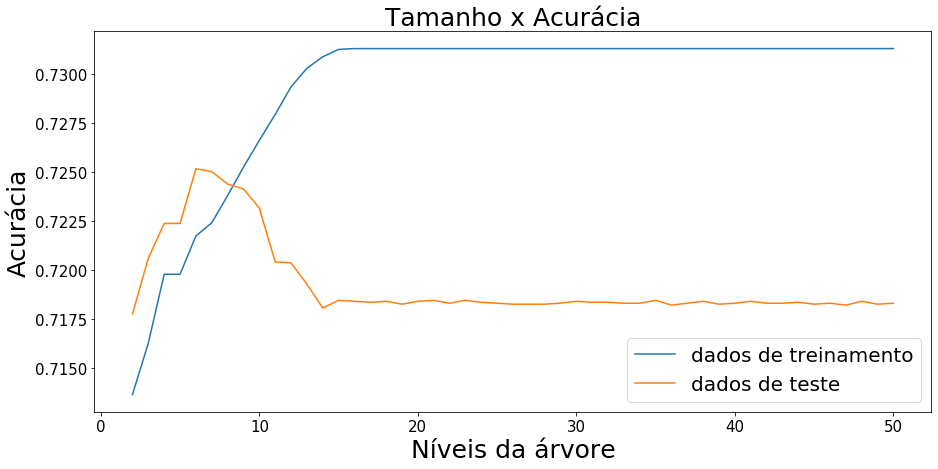

In [21]:
plot_graph(tree_levels, results_train['accuracy'], results_test['accuracy'], 'Níveis da árvore', 'Acurácia', 'Tamanho x Acurácia')

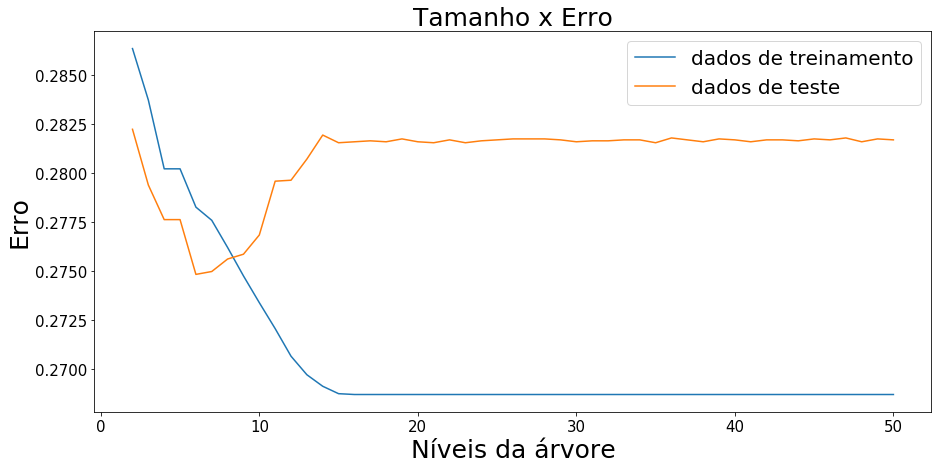

In [22]:
plot_graph(tree_levels, results_train['error'], results_test['error'], 'Níveis da árvore', 'Erro', 'Tamanho x Erro')

### Gini

In [23]:
results_train = MyDecisionTreeClassifier(X_train, Y_train, tree_levels, 'gini')
results_test = MyDecisionTreeClassifier(X_test, Y_test, tree_levels, 'gini')

print('------- Dataset Test | criterion gini --------')
print('Max acurracy: ', max(results_test['accuracy']))
print('Max error: ', max(results_test['error']))

------- Dataset Test | criterion gini --------
Max acurracy:  0.72518147930155
Max error:  0.28222483814008237


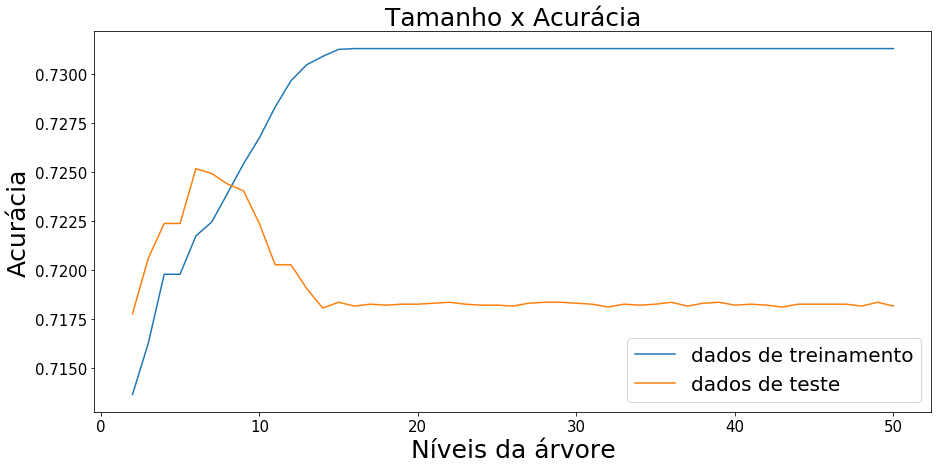

In [24]:
plot_graph(tree_levels, results_train['accuracy'], results_test['accuracy'], 'Níveis da árvore', 'Acurácia', 'Tamanho x Acurácia')

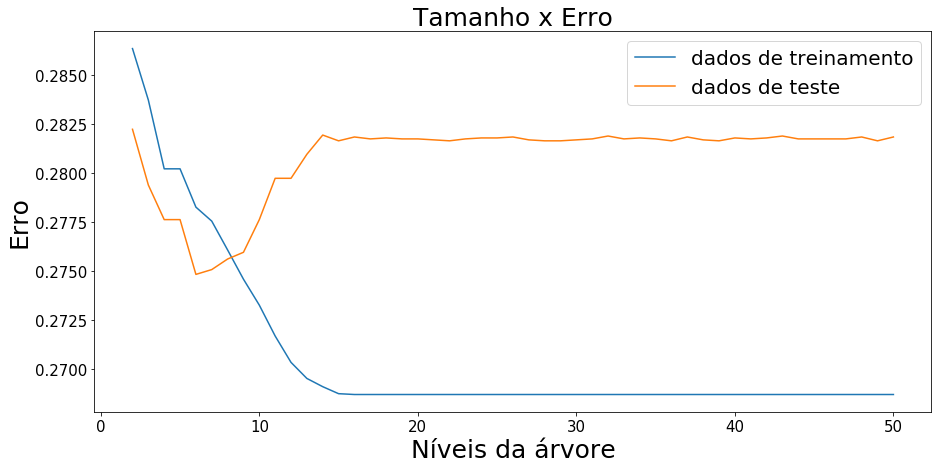

In [25]:
plot_graph(tree_levels, results_train['error'], results_test['error'], 'Níveis da árvore', 'Erro', 'Tamanho x Erro')

## Redes Neurais MLP

In [26]:
from keras import Sequential
from keras.layers import Dense


number_epochs = 10

2021-10-27 19:07:17.104886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-27 19:07:17.104928: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Modelo 1

In [27]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=len(X.columns)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

2021-10-27 19:07:18.814932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-27 19:07:18.815396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-27 19:07:18.815487: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-27 19:07:18.815567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-27 19:07:18.815652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

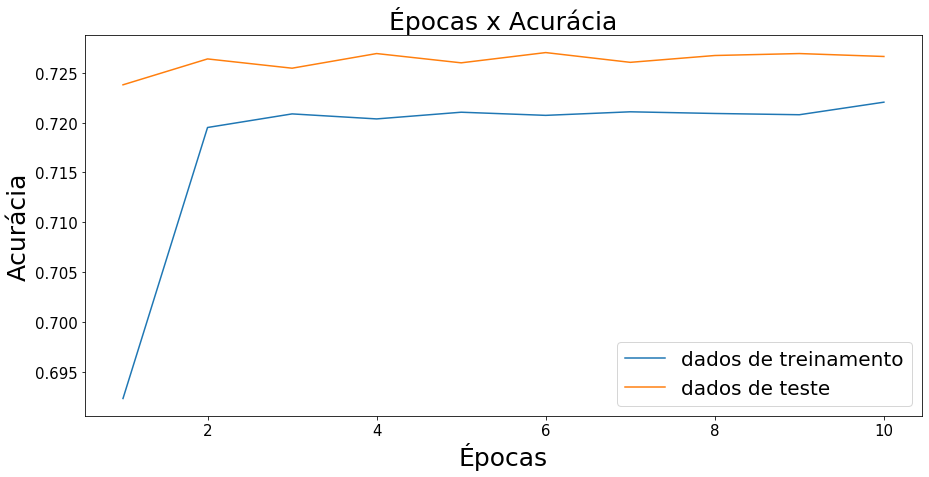

In [28]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

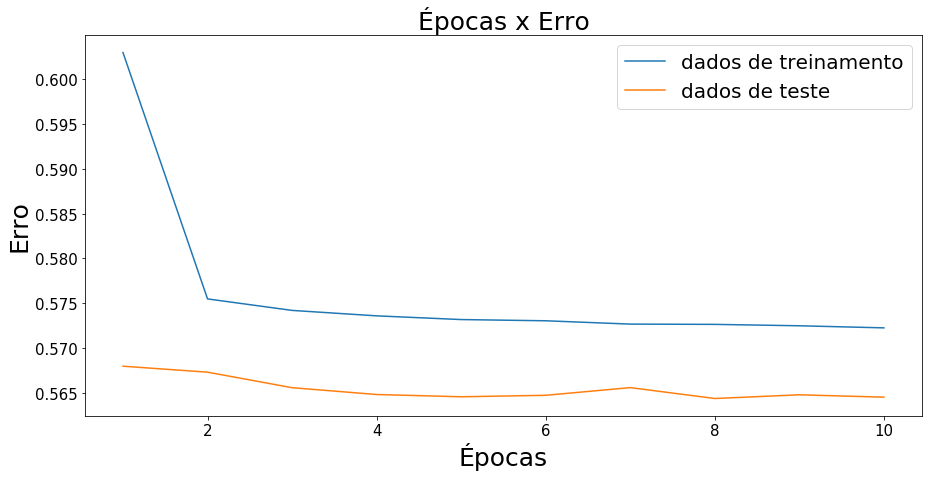

In [29]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')

## Modelo 2

In [30]:
model = Sequential()
model.add(Dense(15, activation='sigmoid', input_dim=len(X.columns)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

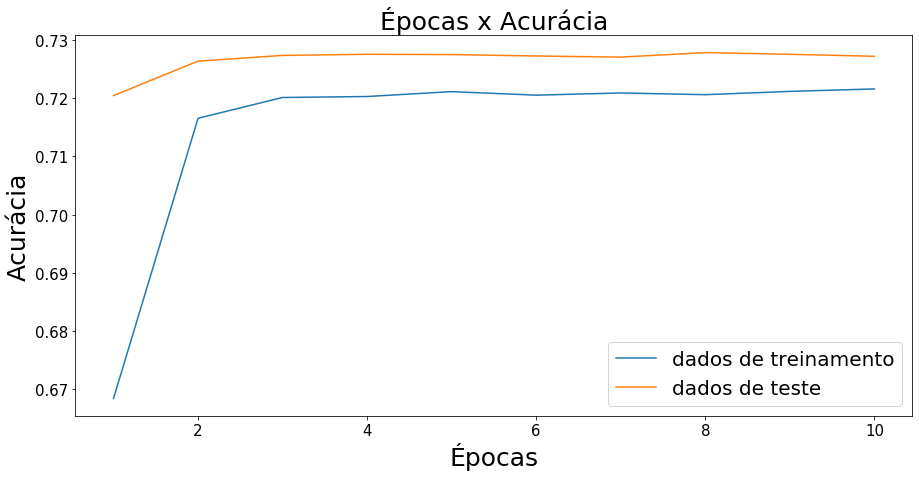

In [31]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

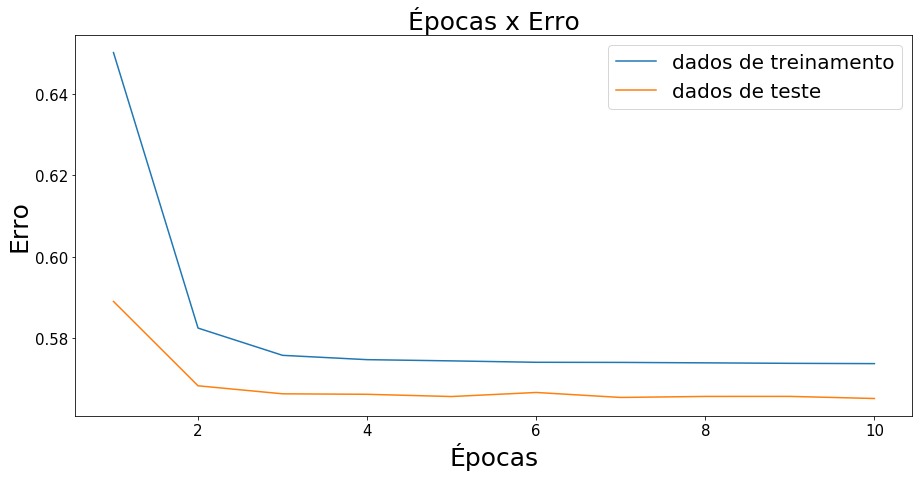

In [32]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')

## Modelo 3

In [33]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=len(X.columns)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

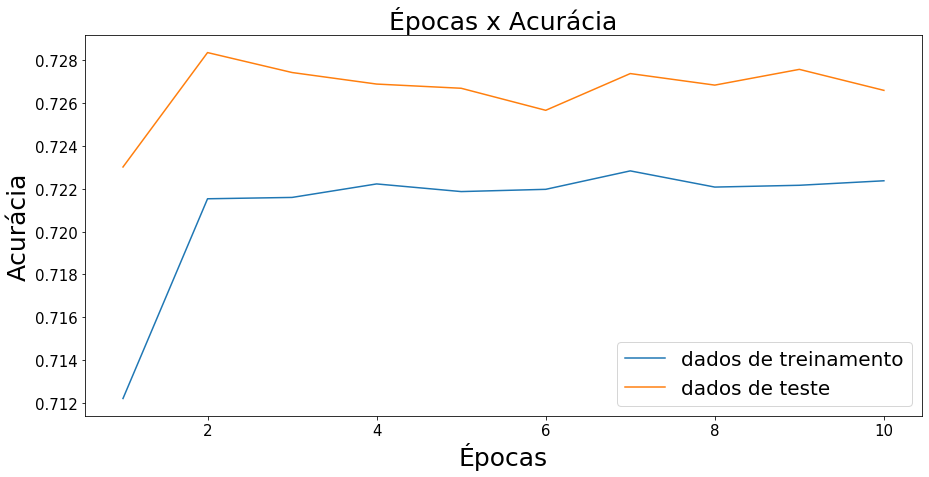

In [34]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

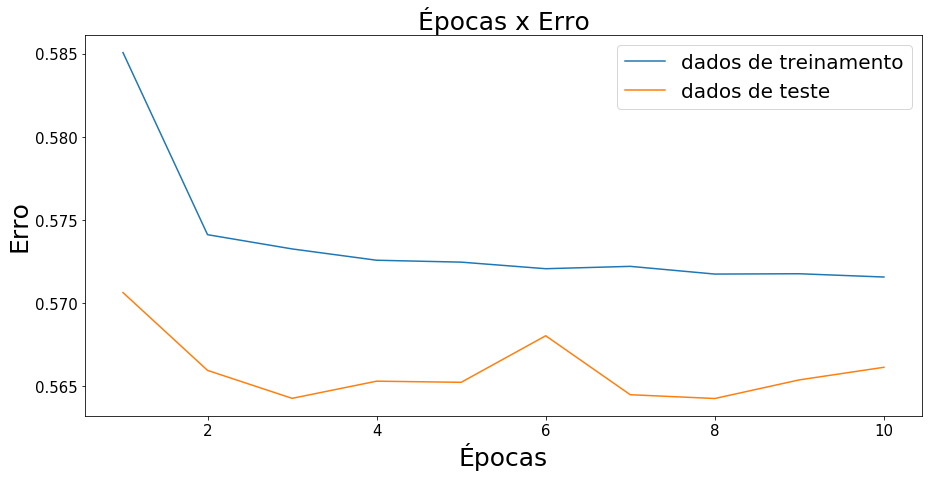

In [35]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')

## Modelo 4

In [36]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=len(X.columns)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

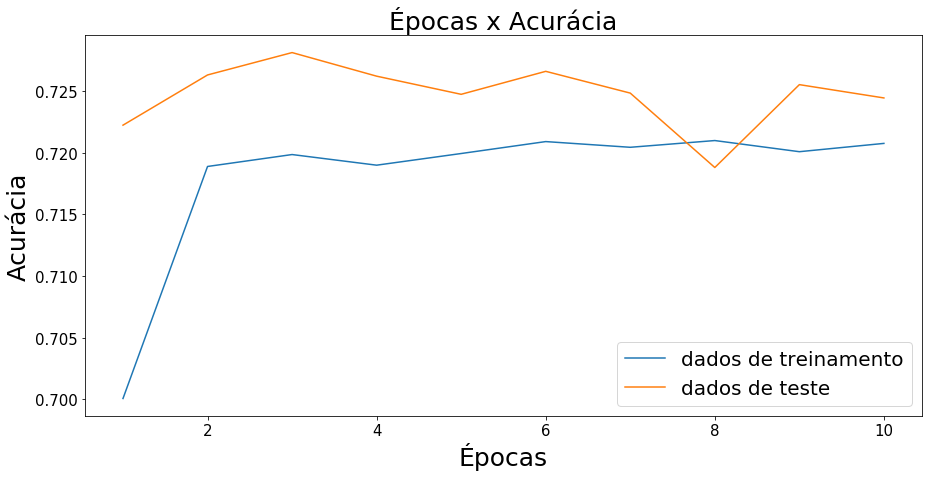

In [37]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

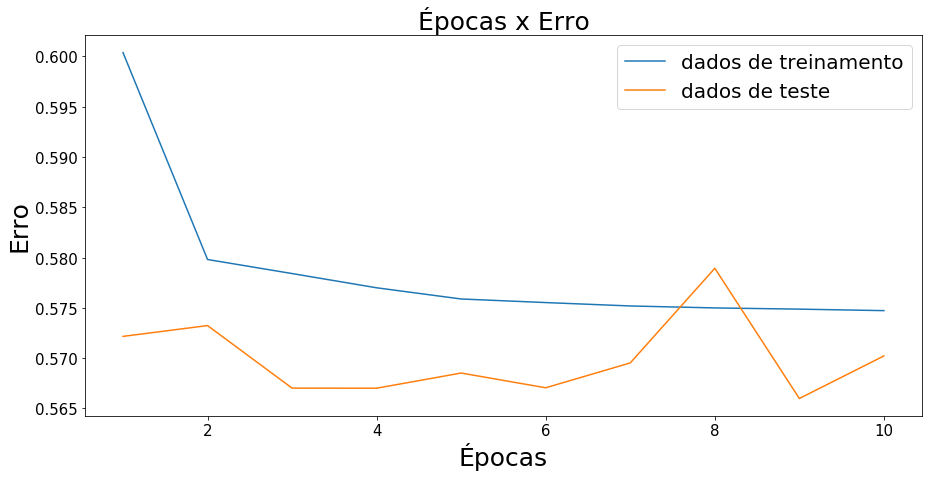

In [38]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')

## Modelo 5

In [39]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=len(X.columns)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

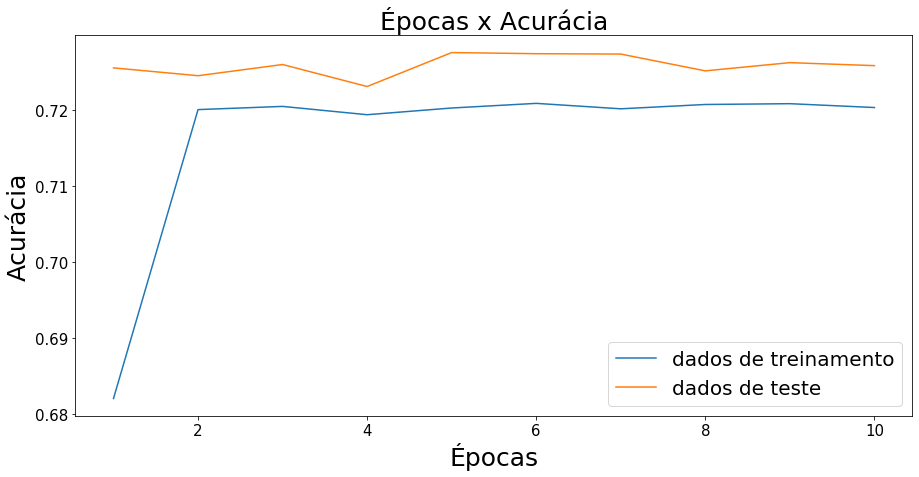

In [40]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

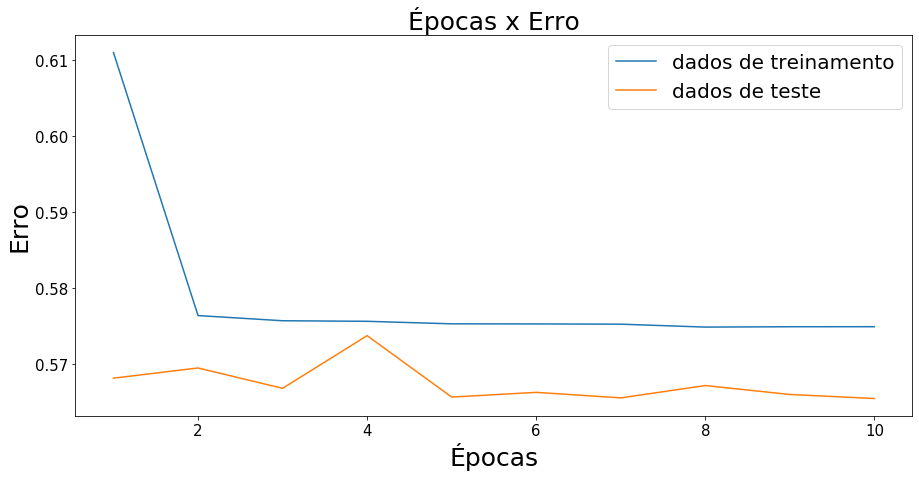

In [41]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')

## Modelo 6

In [42]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(X.columns)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, Y_train, batch_size=64, epochs=number_epochs, verbose=False, 
    validation_data=(X_test, Y_test)
).history

epochs = range(1, len(history['loss']) + 1)

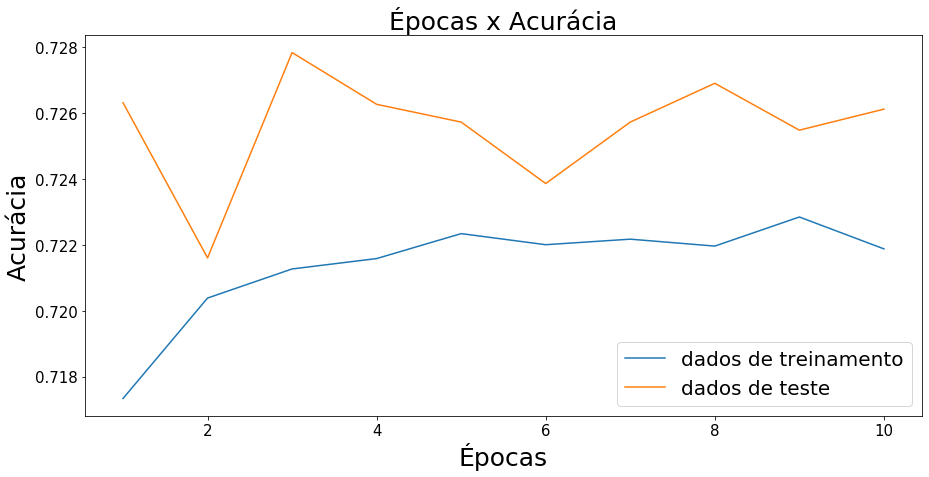

In [43]:
plot_graph(epochs, history['accuracy'], history['val_accuracy'], 'Épocas', 'Acurácia', 'Épocas x Acurácia')

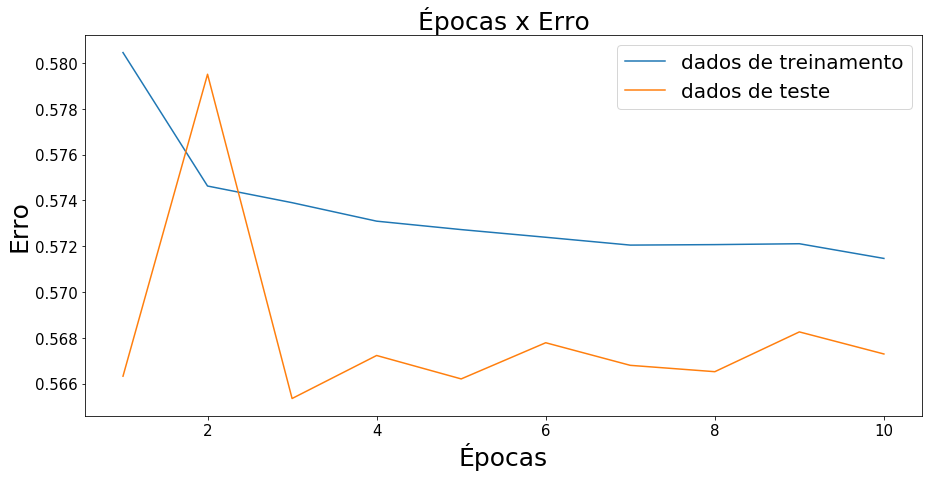

In [44]:
plot_graph(epochs, history['loss'], history['val_loss'], 'Épocas', 'Erro', 'Épocas x Erro')